# Universality of the Uniform
The standard uniform distribution $U$ has two very interesting property. 
1. You can create random-variables of any distribution with it, given that you have its inverse CDF (Quantile function). $F^{-1}(U)=X$
2. You can do the inverse of the above and create the standard uniform distribution, given that you have the CDF and the rvs. of that CDF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create the rvs., given the inverse CDF
$F^{-1}(U)=X$
#### For illustration we will use logistic rvs.
Logistic CDF:
$F(x)=\frac{e^x}{1+e^x}$

Logistic Inverse CDF: $F^-1(p)=log(\frac{p}{1-p})$

#### Now let p be U
$F^-1(U)=log(\frac{U}{1-U})=X$

### Run simulation:

In [86]:
n_simulations = int(10e4)
rv_counts = {}

In [87]:
for i in range(n_simulations):
    r = np.random.rand()
    x_float = np.log(r/(1-r))
    x_int = int(np.round(x_float))
    try:
        rv_counts[x_int] += 1
    except KeyError:
        rv_counts[x_int] = 1

In [89]:
bar_x = []
bar_y = []

for x in rv_counts:
    bar_x.append(x)
    bar_y.append(rv_counts[x])

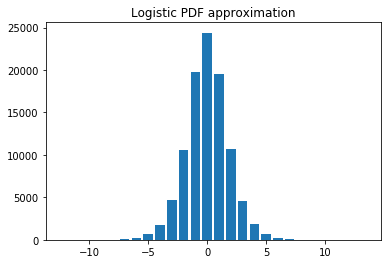

In [94]:
plt.bar(bar_x, bar_y, align='center')
plt.title('Logistic PDF approximation')
plt.show()

# 2. Create standard uniform rvs., given the CDF and its rvs.
$F(X)=U$

In [185]:
n_simulations = int(10e4)
rv_counts = {}

for i in range(n_simulations):
    X = np.random.logistic()
    F = np.exp(X) / (1 + np.exp(X))
    # scale to easily convert to categorical
    F *= 10
    F = np.ceil(F)
    F /= 10
    try:
        rv_counts[F] += 1
    except KeyError:
        rv_counts[F] = 1

In [186]:
bar_x = []
bar_y = []

for x in rv_counts:
    bar_x.append(x)
    bar_y.append(rv_counts[x])

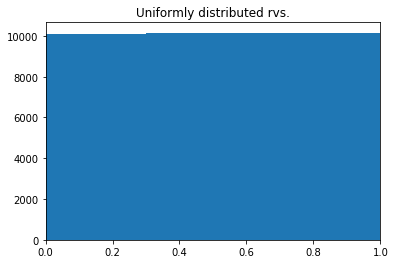

In [187]:
plt.bar(bar_x, bar_y, align='center')
plt.title('Uniformly distributed rvs.')
plt.xlim(0.0, 1.0)
plt.show()

## Why does this work?
There are two ways to prove this:
1. Mathematically
2. By using a story (formally)

I'll be presenting both, but it is much more important to understand the latter story-proof.

### 1. Mathematical Proof
We are assuming $X$ to be equal to $F^{-1}(U)$, so lets see if the laws of probability are still valid and the same then:

$ P(X\leq x) = P(F^{-1}(U)\leq x) = P(U\leq F(x)) = F(x) $

$ P(X\leq x) = F(x)$

For the proof of the second statement $F(X)=U$ we let $Y=F(X)$ and bare in mind that $ P(U\leq p)=p $.

$ P(Y\leq y) = P(F(X)\leq y) = P(X\leq F^{-1}(y)) = F(F^{-1}(y)) = y $

### 2. Story Proof

Imagine students taking an exam and let $X$ be the score (lets say between 0 and 100) of a random student. Also assume that the scores are continous (which we have to do).


##### $F(X)=U$  Proof
The percentile function $F(x)$ says how much better a student with score $x$ is better than the rest (in the top 0.xx %). Now it may often be the case that X has a very strange looking distribution, but its percentiles are all uniform (for example: there are as many students at the bottom 10% as in the top 10%, or between [0.4;0.5] and [0.5;0.6]). Therefore the percentiles of the students are uniformly distributed.

##### $F^{-1}(U)=X$  Proof
The quantile function $F^{-1}(p)$ give you the points that are needed for a student to be in the top 0.xx percent. Since the percentiles of the students (top 5%, bottom 5%) are uniformly distributed, sampling a random uniform percentile (between 0.0 and 1.0) is like picking a random studend, which is the definition of $X$. So $F^{-1}(U)=X$